# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Muhammad Nelwan Fakhri
**NIM:** 122140173

**Link:** https://github.com/shrxxxk/Muhammad-Nelwan_122140173_.git

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# ========================================================
# 1. LOAD GAMBAR SELFIE
# ========================================================    
path = os.path.join('assets_ws4', 'selfie.jpg')

img = cv2.imread(path)
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan. Cek path dan filename.")

# ========================================================
# 2. CROPPING MANUAL
# ========================================================
# ---- Crop wajah (kotak ) ----
face_crop = img[500:1900, 700:2100]

# ---- Crop background (persegi panjang) ----
bg_crop = img[200:1000, 0:600] 

# ========================================================
# 3. RESIZE KE 920 × 920
# ========================================================
face_resized = cv2.resize(face_crop, (920, 920))
bg_resized = cv2.resize(bg_crop, (920, 920))

# ========================================================
# 4. KONVERSI WARNA (GRAY & HSV)
# ========================================================
gray_face = cv2.cvtColor(face_resized, cv2.COLOR_BGR2GRAY)
hsv_face = cv2.cvtColor(face_resized, cv2.COLOR_BGR2HSV)

# ========================================================
# 5. ANOTASI TEKS
# ========================================================
annotated = face_resized.copy()
cv2.putText(annotated, "Muhammad Nelwan", (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 4, cv2.LINE_AA)

# ========================================================
# 6. TAMPILKAN SEMUA HASIL
# ========================================================
cv2.imshow("Cropped Wajah (920x920)", face_resized)
cv2.imshow("Cropped Background (920x920)", bg_resized)
cv2.imshow("Wajah - Grayscale", gray_face)
cv2.imshow("Wajah - HSV", hsv_face)
cv2.imshow("Wajah + Anotasi", annotated)

cv2.imwrite("assets_ws4/face_resized.png", face_resized)
cv2.imwrite("results_ws4/bg_resized.png", bg_resized)
cv2.imwrite("results_ws4/gray_face.png", gray_face)
cv2.imwrite("results_ws4/hsv_face.png", hsv_face)
cv2.imwrite("results_ws4/annotated_face.png", annotated)

# ====== Loop ======
while True:
    if cv2.waitKey(100) & 0xFF == ord('q'):
        print("Tekan 'q' untuk keluar")
        break

    # jika semua window ditutup → program berhenti
    if cv2.getWindowProperty("Cropped Wajah (920x920)", cv2.WND_PROP_VISIBLE) < 1:
        break

cv2.destroyAllWindows()


Tekan 'q' untuk keluar


* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.

    * Cropping membagi foto menjadi bagian wajah dan background untuk fokus pemrosesan. Hasil crop di-resize menjadi 920×920 agar ukurannya seragam. Grayscale mengubah gambar menjadi satu kanal intensitas, sedangkan HSV memisahkan warna menjadi hue, saturation, dan value yang lebih stabil untuk analisis warna.

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.


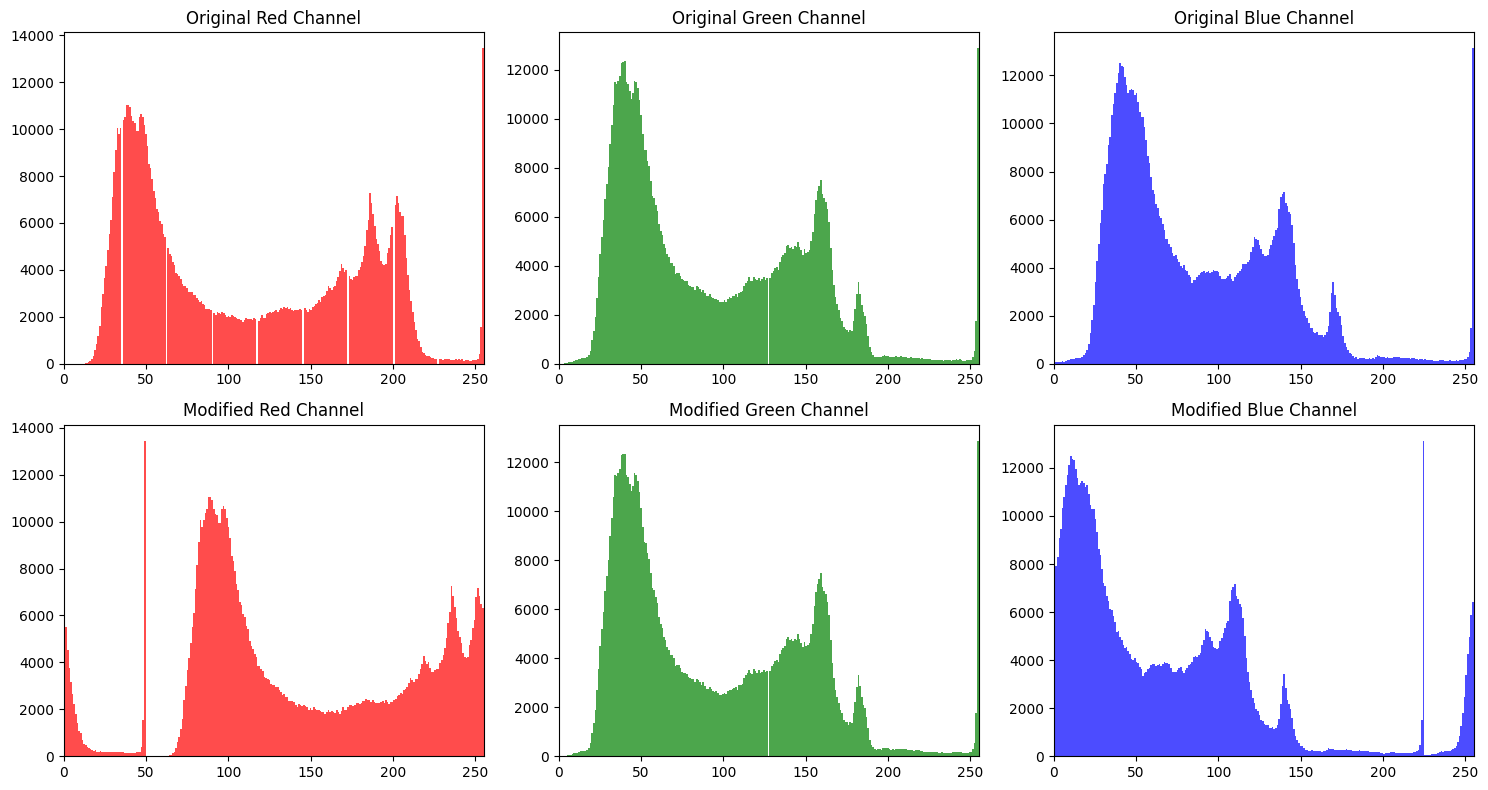

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# ================================
# 1. LOAD GAMBAR CROP
# ================================
img_path = os.path.join('assets_ws4', 'face_resized.png')
img_bgr = cv2.imread(img_path)
if img_bgr is None:
    raise FileNotFoundError("Gambar tidak ditemukan di path: " + img_path)

# ================================
# 2. KONVERSI BGR → RGB
# ================================
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# ================================
# 3. MANIPULASI CHANNEL
# ================================
r, g, b = cv2.split(img_rgb)

# Naikkan intensitas merah (max 255)
r_mod = np.clip(r + 50, 0, 255).astype(np.uint8)

# Turunkan intensitas biru (min 0)
b_mod = np.clip(b - 30, 0, 255).astype(np.uint8)

# Gabungkan channel
img_mod_rgb = cv2.merge((r_mod, g, b_mod))

# ================================
# 4. SIMPAN HASIL MODIFIKASI
# ================================
img_mod_bgr = cv2.cvtColor(img_mod_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite(os.path.join('results_ws4', 'face_rgb_modified.png'), img_mod_bgr)

# ================================
# 5. TAMPILKAN HISTOGRAM PER CHANNEL
# ================================
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
channels = ['Red', 'Green', 'Blue']

# Histogram gambar asli
for i, (channel, col) in enumerate(zip([r, g, b], ['red', 'green', 'blue'])):
    axes[0, i].hist(channel.ravel(), bins=256, color=col, alpha=0.7)
    axes[0, i].set_title(f'Original {channels[i]} Channel')
    axes[0, i].set_xlim([0,255])

# Histogram gambar modifikasi
for i, (channel, col) in enumerate(zip([r_mod, g, b_mod], ['red', 'green', 'blue'])):
    axes[1, i].hist(channel.ravel(), bins=256, color=col, alpha=0.7)
    axes[1, i].set_title(f'Modified {channels[i]} Channel')
    axes[1, i].set_xlim([0,255])

plt.tight_layout()
plt.show()


* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.

    * Perubahan nilai pada channel RGB memengaruhi warna akhir tiap piksel. Ketika satu channel dinaikkan, warna piksel akan bergeser ke arah channel tersebut. Sebaliknya, ketika suatu channel diturunkan, kontribusinya pada warna hilang dan digantikan oleh channel lain yang nilainya lebih tinggi. Pada gambar ini, channel biru diturunkan sehingga warnanya melemah dan area tersebut didominasi oleh channel hijau.

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.

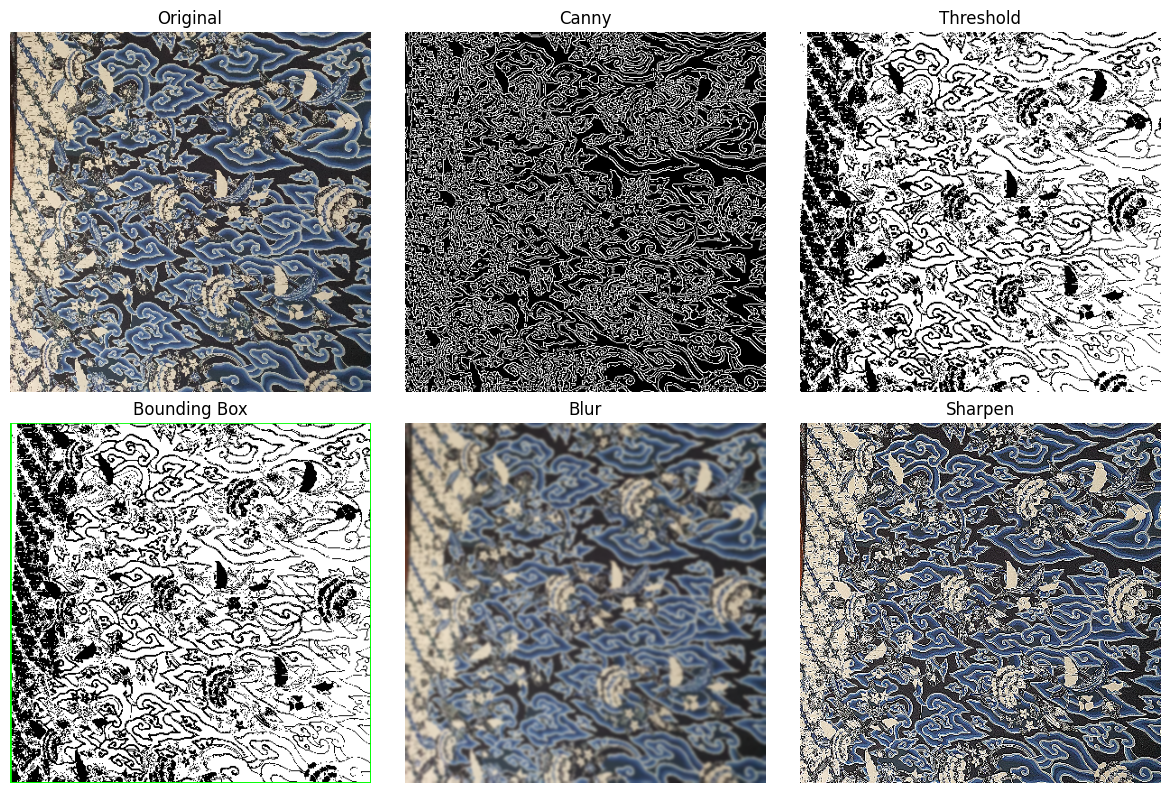

True

In [3]:
import cv2
import numpy as np
import os

img_path = os.path.join('assets_ws4', 'batik.jpg')
img = cv2.imread(img_path)

img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError("Gambar tidak ditemukan. Cek path dan filename.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ====== 2. EDGE DETECTION (CANNY) ======
edges = cv2.Canny(gray, 50, 150)

# ====== 3. THRESHOLDING ======
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# ====== 4. BOUNDING BOX MANUAL ======
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_box = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)  

if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(img_box, (x, y), (x + w, y + h), (0, 255, 0), 2)
else:
    print("Tidak ditemukan objek pada hasil thresholding.")

# ====== 5. BLUR DAN SHARPEN ======
# Blur (Gaussian)
blur = cv2.GaussianBlur(img, (7, 7), 0)

# Sharpen (kernel)
kernel_sharp = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])
sharpen = cv2.filter2D(img, -1, kernel_sharp)

# ====== 6. TAMPILKAN HASIL ======
images = [
    ("Original", cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),
    ("Canny", edges),
    ("Threshold", thresh),
    ("Bounding Box", cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB)),
    ("Blur", cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),
    ("Sharpen", cv2.cvtColor(sharpen, cv2.COLOR_BGR2RGB)),
]

plt.figure(figsize=(12, 8))

for i, (title, im) in enumerate(images):
    plt.subplot(2, 3, i + 1)
    if len(im.shape) == 2:
        plt.imshow(im, cmap="gray")
    else:
        plt.imshow(im)
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()

cv2.imwrite("results_ws4/edges.png", edges)
cv2.imwrite("results_ws4/thresh.png" , thresh)
cv2.imwrite("results_ws4/img_box.png", img_box)
cv2.imwrite("results_ws4/blur.png", blur)
cv2.imwrite("results_ws4/sharpen.png", sharpen)


* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.

    * **Canny** : Menyorot motif yang ada pada tepi gambar, kelebihannya desain tepi menjadi terlihat, kelemahannya background dan warna menjadi hilang.
     * **Thresholding** : Mengubah gambar grayscale menjadi gambar hitam putih berdasarkan ambang nilai tertentu, bekerja dengan cara detail halus pada gambar menjadi menghilang, kemudian area dengan banyak motif/tekstur menjadi banyak blok putih dan hitam tergantung nilai tadi.
    * **Bounding Box** : Hanya untuk meng highlight detail yang diinginkan, detail gambar tidak mengalami perubahan.
    * **Blur** : Mengurangi noise dengan meratakan nilai piksel
    * **Sharpen** : Memperjelas detail pada gambar dengan cara mengkontraskan area pada tepi gambar.

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.

In [4]:
import cv2
import mediapipe as mp
import numpy as np


def rotate_image(img, angle):
    """Rotate RGBA image around its center"""
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(
        img, M, (w, h),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(0, 0, 0, 0)
    )
    return rotated

class Camera: 
    def __init__(self, width=720, height=640, mustache_path = os.path.join("assets_ws4", "kumis2.png")):
        self.cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
        self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
        self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)

        if not self.cap.isOpened():
            raise RuntimeError("Camera error")

        self.face_mesh = mp.solutions.face_mesh.FaceMesh(
            static_image_mode=False,
            max_num_faces=1,
            min_detection_confidence=0.7,
            min_tracking_confidence=0.7
        )

        mustache = cv2.imread(mustache_path, cv2.IMREAD_UNCHANGED)
        if mustache is None:
            raise FileNotFoundError(f"Mustache image not found: {mustache_path}")

        if mustache.shape[2] == 3:
            alpha = np.ones(mustache.shape[:2], dtype=np.uint8) * 255
            mustache = np.dstack([mustache, alpha])

        self.mustache = mustache

    def overlay_image_alpha(self, img, overlay, pos):
        """
        Overlay RGBA `overlay` onto BGR `img` at position pos=(x,y).
        Handles partial overlays (clipping when overlay goes outside img).
        """
        x, y = pos
        h_ol, w_ol = overlay.shape[:2]
        h_img, w_img = img.shape[:2]

        # Compute intersection area
        x1 = max(x, 0)
        y1 = max(y, 0)
        x2 = min(x + w_ol, w_img)
        y2 = min(y + h_ol, h_img)

        if x1 >= x2 or y1 >= y2:
            return  # no intersection

        # Corresponding overlay region
        ol_x1 = x1 - x
        ol_y1 = y1 - y
        ol_x2 = ol_x1 + (x2 - x1)
        ol_y2 = ol_y1 + (y2 - y1)

        overlay_region = overlay[ol_y1:ol_y2, ol_x1:ol_x2]
        overlay_rgb = overlay_region[:, :, :3].astype(float)
        alpha = overlay_region[:, :, 3].astype(float) / 255.0
        alpha = alpha[:, :, None]

        roi = img[y1:y2, x1:x2].astype(float)

        blended = (alpha * overlay_rgb + (1 - alpha) * roi)
        img[y1:y2, x1:x2] = blended.astype(np.uint8)

    def get_frame(self):
        ret, frame = self.cap.read()
        if not ret:
            return None, None

        h, w = frame.shape[:2]
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = self.face_mesh.process(rgb)
        out = frame.copy()

        if results.multi_face_landmarks:
            face = results.multi_face_landmarks[0].landmark

            left = face[61]
            right = face[291]
            top = face[0]
            bottom = face[13]

            left_xy = np.array([left.x * w, left.y * h])
            right_xy = np.array([right.x * w, right.y * h])
            top_xy = np.array([top.x * w, top.y * h])
            bottom_xy = np.array([bottom.x * w, bottom.y * h])

            # angle berdasarkan garis kiri->kanan
            dx = right_xy[0] - left_xy[0]
            dy = right_xy[1] - left_xy[1]
            angle = np.degrees(np.arctan2(dy, dx))

            # ukuran berdasarkan jarak bibir; pastikan > 0
            raw_width = np.linalg.norm(right_xy - left_xy)
            raw_height = np.linalg.norm(top_xy - bottom_xy)
    
            lip_width = int(max(30, raw_width * 2.0))
            lip_height = int(max(25, raw_height * 7.0))

            # optional: batasi supaya tidak melebihi frame
            lip_width = min(lip_width, w)
            lip_height = min(lip_height, h)

            center = ((top_xy + bottom_xy) / 2).astype(int)
            x1 = int(center[0] - lip_width // 2)
            y1 = int(center[1] - lip_height // 2)

            # Resize dan rotate
            try:
                resized = cv2.resize(self.mustache, (lip_width, lip_height), interpolation=cv2.INTER_AREA)
            except Exception as e:
                # jika ukuran invalid (sangat kecil), skip overlay
                return out, None

            rotated = rotate_image(resized, angle)

            # Overlay (fungsi sekarang menangani clipping)
            self.overlay_image_alpha(out, rotated, (x1, y1))

        return out, None

    def release(self):
        self.cap.release()

# ===== RUN =====
if __name__ == "__main__":
    cam = Camera(mustache_path="kumis2.png")
    while True:
        frame, _ = cam.get_frame()
        if frame is None:
            break

        cv2.imshow("Kumis Rotasi Mengikuti Kepala", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    cam.release()
    cv2.destroyAllWindows()


* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

    * Saya menghitungnya berdasarkan landmark wajah dari mediapipe face mesh dan rotasi nya, agar kumis bisa bergerak bebas sesuai dengan pergerakan kepala saya. Tantangannya yaitu menyelaraskan ukuran kumis agar tidak tampak aneh dan memastikan kumis benar-benar berada di tempatnya.

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.

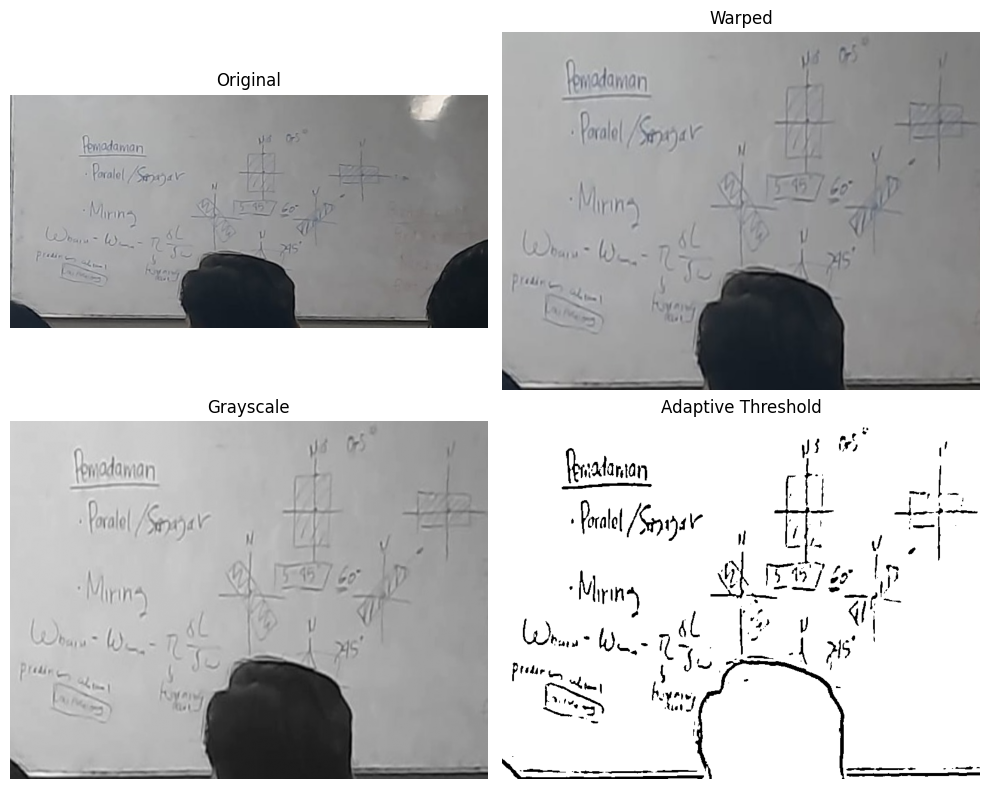

Semua gambar berhasil disimpan!


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ==============================================
# 1. Load image
# ==============================================
path = os.path.join("assets_ws4", "lecture.jpeg")
img = cv2.imread(path)

if img is None:
    print("Gambar tidak ditemukan:", path)
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    orig = img.copy()

# ==============================================
# 2. 4 titik dari gambar yang kamu kirim
# ==============================================
pts_src = np.float32([
    [40, 40],      # top-left
    [610, 55],     # top-right
    [630, 370],    # bottom-right
    [25, 360]      # bottom-left
])

# ==============================================
# 3. Output size
# ==============================================
w, h = 800, 600
pts_dst = np.float32([
    [0, 0],
    [w-1, 0],
    [w-1, h-1],
    [0, h-1]
])

# ==============================================
# 4. Homografi
# ==============================================
H, _ = cv2.findHomography(pts_src, pts_dst)
warped = cv2.warpPerspective(img, H, (w, h))

# ==============================================
# 5. Grayscale
# ==============================================
gray = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)

# ==============================================
# 6. Adaptive Threshold
# ==============================================
th = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    35, 10
)

# ==============================================
# 7. Tampilkan grid
# ==============================================
titles = ["Original", "Warped", "Grayscale", "Adaptive Threshold"]
images = [img, warped, gray, th]

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

cv2.imwrite("results_ws4/warped.png", warped)
cv2.imwrite("results_ws4/gray.png" , gray)
cv2.imwrite("results_ws4/th.png", th)

print("Semua gambar berhasil disimpan!")


* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

    * **Homografi**: Meluruskan gambar yang sedikit miring menjadi lurus dan gambar menjadi mudah terbaca.
    * **Grayscale**: Mengurangi kompleksitas warna pada gambar, membuat intensitas warna menjadi stabil sebelum melakukan threshold
    * **Adaptive Threshold**: Meningkatkan kontras pada gambar, membuat tulisan pada papan tulis menjadi sangat jelas.

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.